In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.shape

(70000, 13)

In [20]:
df['height_in_m']= df['height']/100

In [21]:
df['bmi'] = df['weight']/(df['height_in_m']**2)

C:\Users\viktor\AppData\Local\Temp\ipykernel_19704\2514785213.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['bmi'] = df['weight']/(df['height_in_m']**2)


In [ ]:
df['overweight'] = (df['bmi']> 25).astype(int)

In [25]:
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int64

In [26]:
df = df.drop(columns= ['height_in_m','bmi'])

In [27]:
cols_to_normalize = ['cholesterol','gluc','smoke','alco','active']

In [29]:
for col in cols_to_normalize:
    df[col] = df[col].apply(lambda x : 0 if x == 1 else 1 if x > 1 else x)

In [30]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,0
1,1,20228,1,156,85.0,140,90,1,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1
2,2,18857,1,165,64.0,130,70,1,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,0
3,3,17623,2,169,82.0,150,100,0,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1
4,4,17474,1,156,56.0,100,60,0,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,...,44.581025,19.707964,41.050296,22.515191,55.459105,20.160701,19.230182,29.194126,50.472681,1


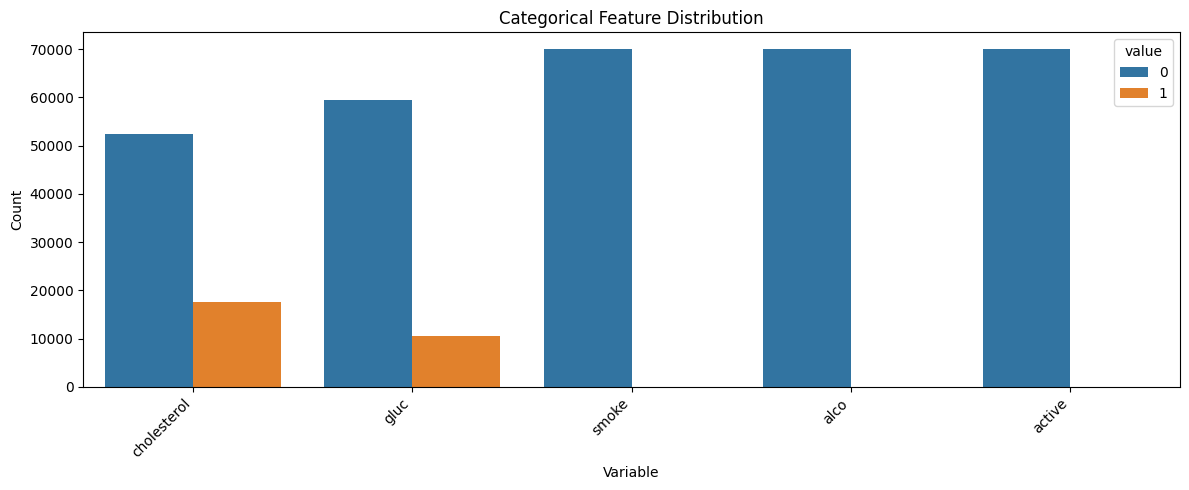

In [32]:
def draw_cat_plot(df):
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars=cols_to_normalize)
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='variable', hue="value", data=df_cat, ax=ax)
    ax.set(xlabel='Variable', ylabel = "Count", title = 'Categorical Feature Distribution')
    plt.xticks(rotation = 45, horizontalalignment = 'right')
    plt.tight_layout()
    plt.show()
    return fig

fig = draw_cat_plot(df)

In [37]:
df_cat = pd.melt(
    df,
    id_vars=['cardio'],
    value_vars  = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
)

df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [38]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().unstack(fill_value=0)

df_cat = df_cat.rename_axis(None, axis=1).reset_index()

df_cat

,cardio,variable,0,1
0,0,active,35021,0
1,0,alco,35021,0
2,0,cholesterol,29330,5691
3,0,gluc,30894,4127
4,0,overweight,15915,19106
5,0,smoke,35021,0
6,1,active,34979,0
7,1,alco,34979,0
8,1,cholesterol,23055,11924
9,1,gluc,28585,6394


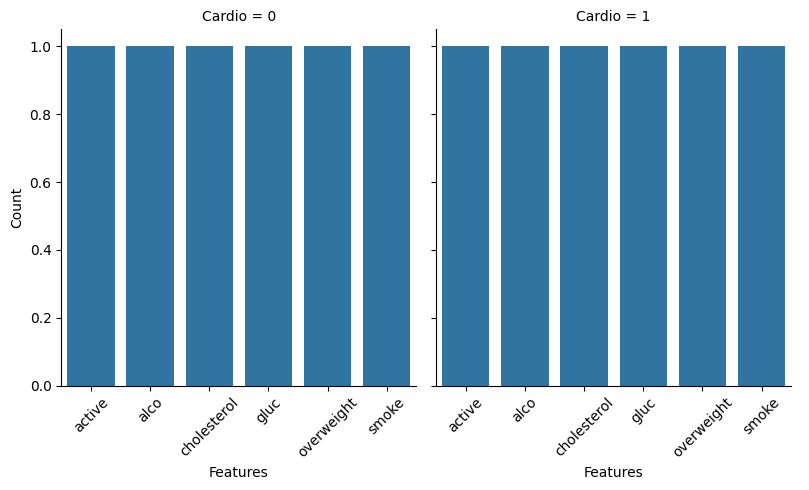

In [44]:
g = sns.catplot(x = 'variable', col = 'cardio', data = df_cat, kind='count', height=5, aspect=0.8)

g.set_axis_labels('Features', "Count")
g.set_titles("Cardio = {col_name}")
g.tick_params(axis="x", rotation = 45)

plt.tight_layout()
plt.show()